In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [2]:
%matplotlib inline
%matplotlib notebook

### Пути к данным с позициями

In [3]:
KITTI_DATA_PATH = Path('./../data/kitti_poses')
CMRNET_DATA_PATH = Path('./../data/cmrnet_poses')
sequence = '00'

kitti_origin_gt = KITTI_DATA_PATH / f'{sequence}.txt'
kitti_cmrnet_gt = CMRNET_DATA_PATH / f'kitti-{sequence}.csv' 

In [4]:
def rotate(ox, oy, px, py, angle):
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [5]:
def draw_3d_plot(x, y, z):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=-40, azim=270)    

In [6]:
def draw_2d_plot(x, y):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    #ax.axis('equal')
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

In [7]:
def draw_2d_2plot(x1, y1, x2, y2):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    #ax.axis('equal')
    ax.plot(x1, y1)
    ax.plot(x2, y2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

In [8]:
df_cmr = pd.read_csv(kitti_cmrnet_gt)

In [9]:
df_cmr.head()

timestamp        x        y        z        qx        qy        qz  \
0          0  14.0773  3.46363  32.5146 -0.035193  0.029469 -0.005343   
1          1  14.7643  3.45799  32.4796 -0.033850  0.028655 -0.003872   
2          2  15.4632  3.45923  32.4405 -0.034014  0.028067 -0.001804   
3          3  16.1811  3.46374  32.3983 -0.034020  0.027615  0.000204   
4          4  16.9129  3.47032  32.3570 -0.034420  0.027366  0.002697   

         qw  
0  0.998932  
1  0.999009  
2  0.999026  
3  0.999040  
4  0.999029

In [10]:
cmr_gt_x = np.array(df_cmr.loc[:, 'x'])
cmr_gt_y = np.array(df_cmr.loc[:, 'y'])
cmr_gt_z = np.array(df_cmr.loc[:, 'z'])

In [11]:
df_kitti = pd.read_csv(kitti_origin_gt, delimiter=' ', header=None)

In [12]:
df_kitti.head()

0             1             2             3             4         5   \
0  1.000000  9.043680e-12  2.326809e-11  5.551115e-17  9.043683e-12  1.000000   
1  0.999998  5.272628e-04 -2.066935e-03 -4.690294e-02 -5.296506e-04  0.999999   
2  0.999991  1.048972e-03 -4.131348e-03 -9.374345e-02 -1.058514e-03  0.999997   
3  0.999980  1.566466e-03 -6.198571e-03 -1.406429e-01 -1.587952e-03  0.999993   
4  0.999964  2.078471e-03 -8.263498e-03 -1.874858e-01 -2.116664e-03  0.999987   

             6             7             8             9         10  \
0  2.392370e-10  3.330669e-16  2.326810e-11  2.392370e-10  1.000000   
1 -1.154865e-03 -2.839928e-02  2.066324e-03  1.155958e-03  0.999997   
2 -2.308104e-03 -5.676064e-02  4.128913e-03  2.312456e-03  0.999989   
3 -3.462706e-03 -8.515762e-02  6.193102e-03  3.472479e-03  0.999975   
4 -4.615826e-03 -1.135202e-01  8.253797e-03  4.633149e-03  0.999955   

             11  
0 -4.440892e-16  
1  8.586941e-01  
2  1.716275e+00  
3  2.574964e+00  
4  3.432648e+00

In [13]:
kitti_gt_x = np.array(df_kitti.iloc[:, 3])
kitti_gt_y = np.array(df_kitti.iloc[:, 7])
kitti_gt_z = np.array(df_kitti.iloc[:, 11])
kitti_gt = np.stack((
    kitti_gt_x,
    kitti_gt_y,
    kitti_gt_z,
    np.ones_like(kitti_gt_z),
))

### Позиции из KITTI

<IPython.core.display.Javascript object>


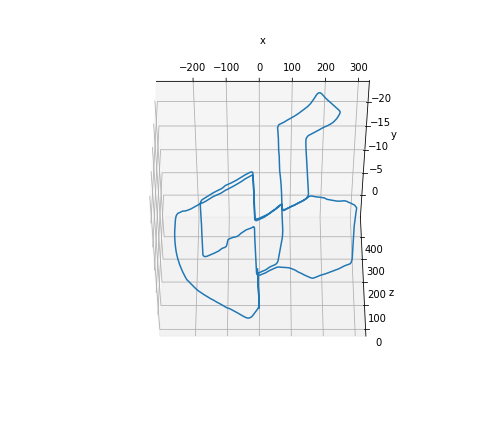

In [14]:
draw_3d_plot(kitti_gt_x, kitti_gt_y, kitti_gt_z)

<IPython.core.display.Javascript object>


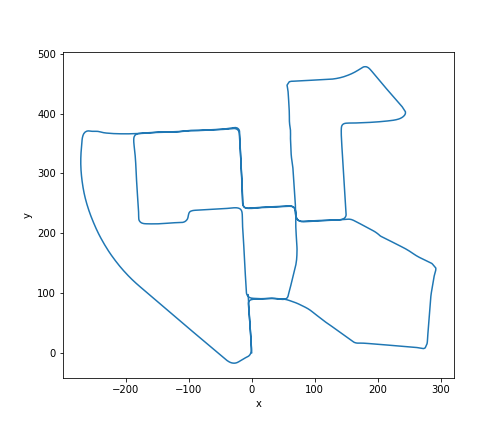

In [15]:
draw_2d_plot(kitti_gt_x, kitti_gt_z)

### Позиции авторов CMRNet

<IPython.core.display.Javascript object>


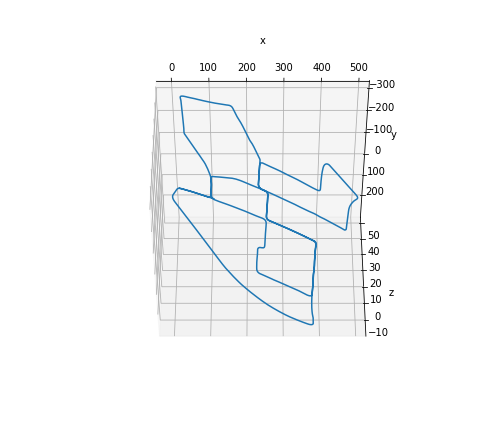

In [16]:
draw_3d_plot(cmr_gt_x, cmr_gt_y, cmr_gt_z)

<IPython.core.display.Javascript object>


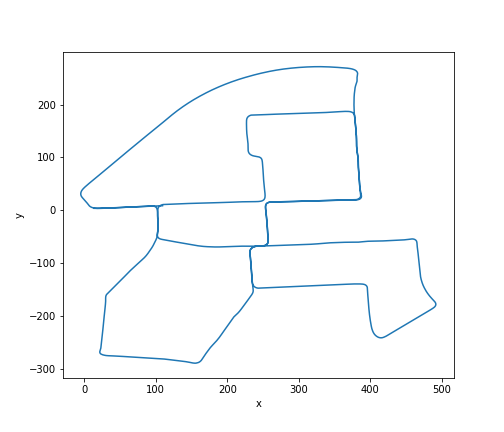

In [17]:
draw_2d_plot(cmr_gt_x, cmr_gt_y)

### На одном графике

In [18]:
# vel to cam transform
T = np.array([
    [-1.857739385241e-03, -9.999659513510e-01, -8.039975204516e-03, -4.784029760483e-03],
    [-6.481465826011e-03, 8.051860151134e-03, -9.999466081774e-01, -7.337429464231e-02],
    [9.999773098287e-01, -1.805528627661e-03, -6.496203536139e-03, -3.339968064433e-01],
    [0,0,0,1],
])

In [19]:
# getting velo coordinates by kitti gt
kitti_gt = (np.linalg.inv(T) @ kitti_gt)[:3]
kitti_gt_x = kitti_gt[0]
kitti_gt_y = kitti_gt[1]
kitti_gt_z = kitti_gt[2]

<IPython.core.display.Javascript object>


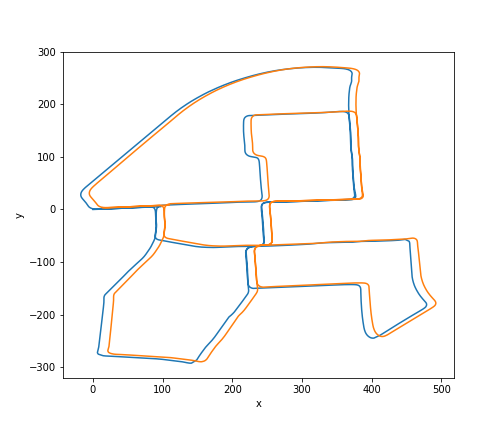

In [20]:
draw_2d_2plot(kitti_gt_x, kitti_gt_y, cmr_gt_x, cmr_gt_y)